In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
x = df.drop(['CustomerID', 'Gender'], axis = 1)

In [5]:
x.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


In [6]:
x = x.rename(columns={'Age': 'age',
                      'Annual Income (k$)': 'annual_income',
                      'Spending Score (1-100)': 'spending_score'})

x.head(3)

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6


In [7]:
from sklearn.cluster import KMeans
#membuat list yang berisi inertia
clusters = []

for i in range(1,11):
  # membuat objek KMeans
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

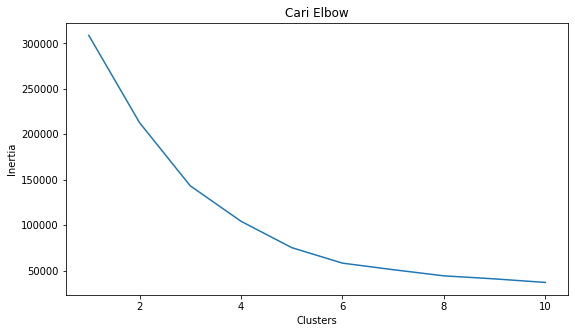

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

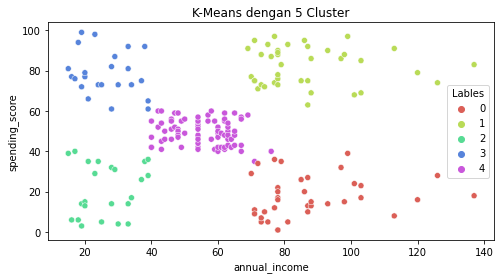

,age,annual_income,spending_score,Lables
0,19,15,39,2
1,21,15,81,3
2,20,16,6,2
3,23,16,77,3
4,31,17,40,2


In [13]:
# latih kembali k-means dengan nolai k dari elbow
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

# menambahkan kolom label pada dataset
x['Lables'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Lables'],
                    palette=sns.color_palette('hls', 5))
plt.title('K-Means dengan 5 Cluster')
plt.show()
x.head()